## Assignment 1 - COMP 472

We are given 2 datasets:

- Data Set 1: Penguins. This dataset, in csv format, with some features and we need to predict species (Adelie, Gentoo, Chinstap).
- Data Set 2: Abalone. This dataset, in csv format, with some features and we need to predict their sex.

In [62]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split

For each dataset:
1. Load the dataset in Python.

In [20]:
# Create dataframes from the dataset csv files. Change the path if required
penguins_df = pd.read_csv('Datasets/penguins.csv', delimiter=',')
abalone_df = pd.read_csv('Datasets/abalone.csv', delimiter=',')

(a) for the Penguin dataset, the features island and sex are strings, therefore they need to be converted to numerical format to be fed to the MLP. To do so, experiment with 2 methods:
  - i. convert these features into 1-hot vectors (also known as dummy-coded data)
  - ii. convert these features into categories yourself

In [25]:
# first experiment: i. convert the features into 1-hot vectors

# encode the features
dummy_coded_island = pd.get_dummies(penguins_df['island'], dtype=float)
dummy_coded_sex = pd.get_dummies(penguins_df['sex'], dtype=float)
dummy_coded_species = pd.get_dummies(penguins_df['species'], dtype=float) # also encoding the target

# Concatenate dummy coded data with penguins_df and drop original columns
one_hot_penguins_df = pd.concat([penguins_df, dummy_coded_island, dummy_coded_sex, dummy_coded_species], axis='columns')
one_hot_penguins_df = one_hot_penguins_df.drop(['island', 'sex', 'species'], axis='columns')

one_hot_penguins_df.head(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Biscoe,Dream,Torgersen,FEMALE,MALE,Adelie,Chinstrap,Gentoo
0,39.1,18.7,181,3750,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,39.5,17.4,186,3800,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,40.3,18.0,195,3250,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,36.7,19.3,193,3450,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,39.3,20.6,190,3650,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [24]:
# second experiment: convert the features into categories yourself
# copy df and convert the features by replacing string values with numerical values
encoded_penguins_df = penguins_df.copy()
encoded_penguins_df['island'].replace(['Biscoe', 'Dream', 'Torgersen'], [0, 1, 2], inplace=True)
encoded_penguins_df['sex'].replace(['FEMALE', 'MALE'], [0, 1], inplace=True)
encoded_penguins_df['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'], [0, 1, 2], inplace=True)  # also encoding the target

encoded_penguins_df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181,3750,1
1,0,2,39.5,17.4,186,3800,0
2,0,2,40.3,18.0,195,3250,0
3,0,2,36.7,19.3,193,3450,0
4,0,2,39.3,20.6,190,3650,1


(b) determine if the Abalone dataset can be used as is; otherwise convert any features using the 2 methods above.

In [27]:
# first experiment: i. convert the target into 1-hot vector

# encode the target
dummy_coded_type = pd.get_dummies(abalone_df['Type'], dtype=float) # encoding the target

# Concatenate dummy coded data with abalone_df and drop original column
one_hot_abalone_df = pd.concat([abalone_df, dummy_coded_type], axis='columns')
one_hot_abalone_df = one_hot_abalone_df.drop(['Type'], axis='columns')

one_hot_abalone_df.head(5)

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,F,I,M
0,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9,1.0,0.0,0.0
1,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10,0.0,0.0,1.0
2,0.460,0.345,0.110,0.4595,0.2350,0.0885,0.1160,7,0.0,0.0,1.0
3,0.650,0.475,0.165,1.3875,0.5800,0.3485,0.3095,9,1.0,0.0,0.0
4,0.575,0.470,0.140,0.8375,0.3485,0.1735,0.2400,11,0.0,0.0,1.0


In [29]:
# second experiment: convert the features into categories yourself
# copy df and convert the target by replacing string values with numerical values
encoded_abalone_df = abalone_df.copy()
encoded_abalone_df['Type'].replace(['F', 'I', 'M'], [0, 1, 2], inplace=True)  # encoding the target

encoded_abalone_df.head(5)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9
1,2,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10
2,2,0.460,0.345,0.110,0.4595,0.2350,0.0885,0.1160,7
3,0,0.650,0.475,0.165,1.3875,0.5800,0.3485,0.3095,9
4,2,0.575,0.470,0.140,0.8375,0.3485,0.1735,0.2400,11


***Observation*** Converting using one-hot labeling is useful because you don't need to know the values of the columns ahead of time but it creates additional columns that aren't required and is not desired for the target class. Converting manually was simplified because the first experiment provided the values that we used for a manual conversion. We'll use the manually encoded dataframes for the following sections.

2. Plot the percentage of the instances in each output class and store the graphic in a file called penguin-classes.gif / abalone-classes.gif. This analysis of the dataset will allow you to determine if the classes are balanced. Which metric is more appropriate to use to evaluate the performance. Be ready to discuss this at the demo.

In [65]:
# function to plot percentage
def plot_class_percentage(df, col, title):
    '''
    Plots the percentage of a specified column of the given dataframe
    '''
    plt.hist(df[col], weights=np.ones(len(df)) / len(df), edgecolor='black')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
    plt.xlabel(col)
    plt.title(title)
    plt.show()

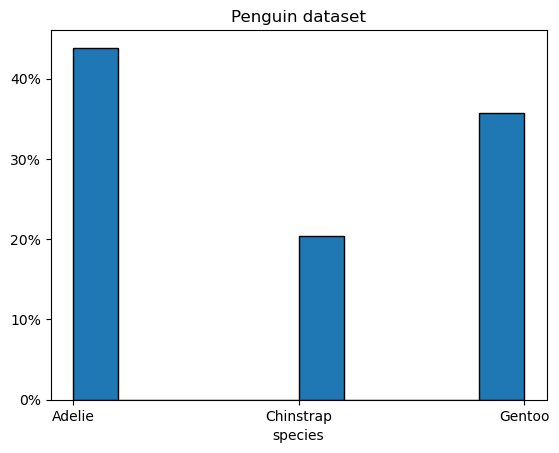

In [66]:
plot_class_percentage(penguins_df, 'species', 'Penguin dataset')

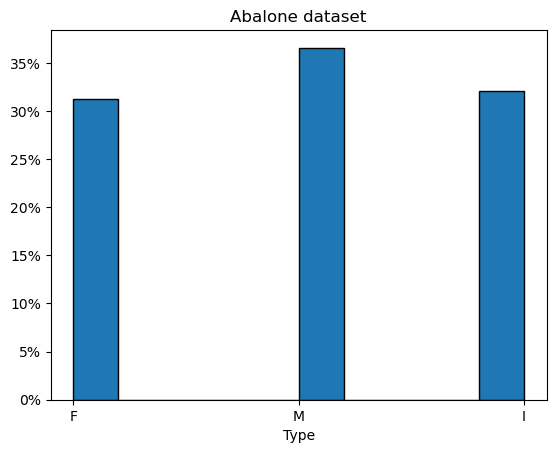

In [67]:
plot_class_percentage(abalone_df, 'Type', 'Abalone dataset')

3. Split the dataset using train test split using the default parameter values.

In [71]:
# function to split a dataframe using the default settings
def default_train_test_split(df, target):
    '''
    Takes a dataframe and a the target class name and returns the X_train, y_train, X_test, y_test splits
    '''
    train, test = train_test_split(df) # split the data into a train and test set

    features = df.loc[:, ~df.columns.isin([target])].columns # get the feature column names

    # X_train contains only features and y_train contains the targets
    X_train = train[features]
    y_train = train[target]

    # X_test contains only features and y_test contains the targets
    X_test = test[features]
    y_test = test[target]

    return X_train, X_test, y_train, y_test

In [76]:
# split the train and test sets for the penguins and abalone datasets
X_train_pen, X_test_pen, y_train_pen, y_test_pen = default_train_test_split(encoded_penguins_df, 'species')
X_train_aba, X_test_aba, y_train_aba, y_test_aba = default_train_test_split(encoded_abalone_df, 'Type')